# Time-independent heat equation solver using finite element method 

<p> This is a demo notebook which introduce the finite element method to solve the time-independent heat equation without source in the domain. It corresponds to solving the Laplace equation: $\Delta T=0$. For now, only Dirichlet boundary conditions are available but futur improvement will be to add mixed boundary conditions.

In [1]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.shapes import rectangle
from src.femmtrx import steady_heat_matrix
from utils.materials_conductivity import conductivity_matrix

## Preprocessing

1. Initialize the shape, dicrestize it and create a triangular mesh.

Shape initialisaton
Discratising...
Meshing...


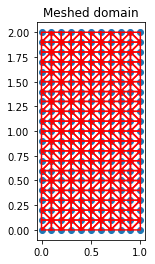

In [2]:
domain = rectangle(1, 2)

# Discretize the simulation domain with typical node distance of delta
delta = .1
domain.discretize(delta)

# Create a triangular mesh based on the dicretized domain
domain.mesh()


# Plot nodes and mesh
fig, ax = plt.subplots()
ax.scatter(domain.points[:,0], domain.points[:,1])

for p in domain.points[domain.mesh.simplices]:
    p = np.append(p, [p[0, :]], axis=0)
    ax.plot(p[:, 0], p[:, 1], 'r-')

ax.set_aspect('equal', 'box')
plt.title("Meshed domain")
plt.show()

2. Calculate the matrix elements

In [9]:
k = conductivity_matrix([2, 2])
rho = 1
cv = 1

Ku, Kbc, unknownT, bcT = steady_heat_matrix(domain, k, rho, cv)

3. Set Dirichlet boundary conditions

In [10]:
bound = domain.boundary[0][:, 0] + 1j*domain.boundary[0][:, 1]
bound1 = domain.boundary[2][:, 0] + 1j*domain.boundary[2][:, 1]

        
T_bar = np.ones((np.shape(domain.boundary_points)[0], 1)) * 50

for i, point in enumerate(domain.boundary_points):
    if point[0]+1j*point[1] in bound:
        T_bar[i] = 0
    elif point[0]+1j*point[1] in bound1:
        T_bar[i] = 100


## Processing

Solve the linear system:
$K_uT = -K_{bc}\overline{T}$

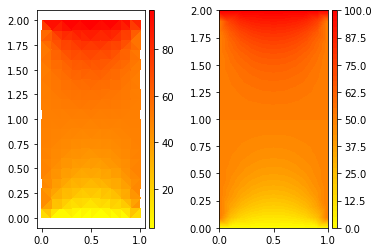

In [11]:
T = solve(Ku, -np.dot(Kbc, T_bar))

solvedT = np.append(T, unknownT, 1)
fixedT = np.append(T_bar, bcT, 1)
total_T = np.append(solvedT, fixedT, 0)

orig_map=plt.cm.get_cmap('autumn')
reversed_map = orig_map.reversed()

fig, (ax1, ax2) = plt.subplots(1, 2)

fig1 = ax1.tripcolor(total_T[:, 1], total_T[:, 2], total_T[:, 0], cmap=reversed_map)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(fig1, cax=cax)
ax1.set_aspect('equal', 'box')

fig2 = ax2.tricontourf(total_T[:, 1], total_T[:, 2], total_T[:, 0], 40, cmap=reversed_map)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(fig2, cax=cax)
ax2.set_aspect('equal', 'box')